# Image Segmentation - Research 

 
 - Many proffesionals say when they have a business problem specially when it involves image processing , they first use the available api's as it reduces the work drastically and i am forced to do it because of my low level pc.
 
 
 
 
 - My final product is a semantic segmentation model.I refered the following resource - https://github.com/bnsreenu/python_for_microscopists/blob/master/177_semantic_segmentation_made_easy_using_segm_models.py
 
 

 
 - The model uses LinkNet as a base model and vgg16 as a back bone model.
 
 
 
 - I used segmentation-models library for easy implementation this architectures.To find more about the library , refer this -
 https://github.com/qubvel/segmentation_models
 
 

 - I used semantic segmentation instead of instance segmentation as final product because instance segmentation is built for multiclass classification and segmentation and i also looked into the dataset given and found that the  model should do the binary classification of the images(semantic segmentation treats multiple objects within a single category as one entity. Instance segmentation, on the other hand, identifies individual objects within these categories), so i thought semantic segmentation is suitable(either the pixel belong to the main object(white) or the other(black))
 
 
 
 - I also tried Unet architecture and resnet34 as a backbone but the results where better with the linknet and vgg16 api,as unet is built for microscop images and mri scans etc..
 
 
 
 - And i wanted to try more techniques but i am not in a position to do so, because of my pc.
 
 
## Improvements

- I am almost certain that training with more images and with more iterations(epochs) the model will will do better.


- Using vgg19 api, this are not actually like totally different ideas but these will improve the prediction.


- Using unet architecture with backbone as vgg16 will be better with more training.



# Problems with the model

- The more complex the background of the image is   , the less the accurate the segmentation and this can be solved by training the model with more images epochs as mentiond.


# Take a look the web app i created for image segmentation

- https://huggingface.co/spaces/SSahas/Image_segmentation




## More webapps on image processing 

- Image recognition - https://huggingface.co/spaces/SSahas/vgg16_imagerecog


- Pedestrian detection - https://github.com/SSahas/Real-Time-Human-detection

In [ ]:
! pip install segmentation-models 

In [4]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [2]:
back_bone = "vgg16"
preprocess_input = sm.get_preprocessing(back_bone)

SIZE_X = 256
SIZE_Y = 256

In [3]:
train_images = []

for directory_path in glob.glob("Work images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        
train_images = np.array(train_images)

In [4]:
train_masks = []
for directory_path in glob.glob("Work mask images"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        
train_masks = np.array(train_masks)

In [5]:
X = train_images
Y = train_masks

x_train, x_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [6]:
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)


model = sm.Linknet(back_bone, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 154s 36s/step - loss: -70.0129 - mse: 13525.8926 - val_loss: -854.2855 - val_mse: 14737.1494
Epoch 2/10
4/4 [==============================] - 135s 32s/step - loss: -121.9952 - mse: 13518.7588 - val_loss: -868.8042 - val_mse: 14737.1445
Epoch 3/10
4/4 [==============================] - 131s 33s/step - loss: -163.1061 - mse: 13515.8271 - val_loss: -843.7597 - val_mse: 14737.2656
Epoch 4/10
4/4 [==============================] - 132s 33s/step - loss: -200.1870 - mse: 13514.0391 - val_loss: -827.4117 - val_mse: 14737.4316
Epoch 5/10
4/4 [==============================] - 133s 33s/step - loss: -236.6902 - mse: 13511.4199 - val_loss: -833.5178 - val_mse: 14737.5088
Epoch 6/10
4/4 [==============================] - 137s 35s/step - loss: -269.2886 - mse: 13510.3477 - val_loss: -834.3677 - val_mse: 14737.5957
Epoch 7/10
4/4 [==============================] - 135s 33s/step - loss: -307.4625 - mse: 13508.8760 - val_loss: -793.1516 - val_mse: 1473

In [8]:
model.save('linkenet_vgg16.h5')

In [5]:
model = keras.models.load_model('linkenet_vgg16.h5', compile=False)

In [9]:


test_img = cv2.imread('test_image.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

In [10]:
prediction = model.predict(test_img)

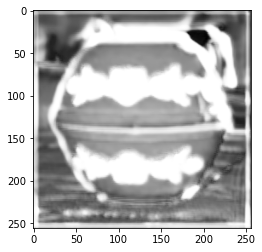

In [11]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('output.jpg', prediction_image, cmap='gray')

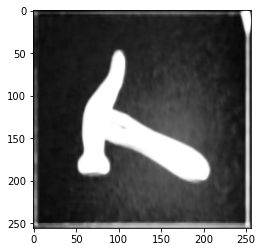

In [12]:
test_img = cv2.imread('test_image2.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

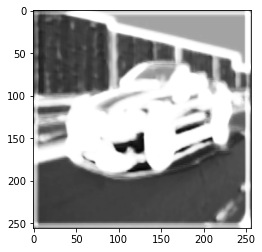

In [13]:
test_img = cv2.imread('test_image3.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

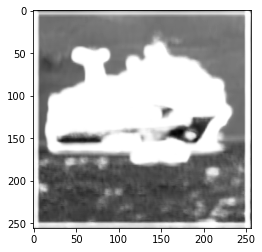

In [14]:
test_img = cv2.imread('Test_image4.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

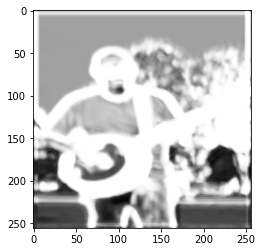

In [16]:
test_img = cv2.imread('Test_image5.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

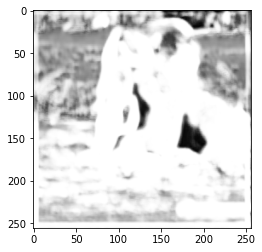

In [17]:
test_img = cv2.imread('elephant.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

In [ ]:
def Segment(path):
    

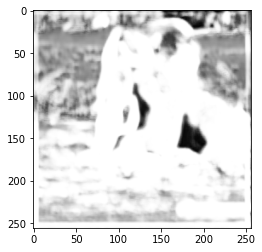

In [6]:
import  matplotlib.image as img 

image = img.imread('elephant.jpg')
plt.imshow(image)

test_img = cv2.imread('elephant.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
cv2.imshow('image', test_img)
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(256, 256)
plt.imshow(prediction_img, cmap = 'gray')